**Data Stratification **

When we split the dataset into train and test datasets, the split is completely random. Thus the instances of each class label or outcome in the train or test datasets is random. Thus we may have many instances of class 1 in training data and less instances of class 2 in the training data. So during classification, we may have accurate predictions for class1 but not for class2. Thus we stratify the data, so that we have proportionate data for all the classes in both the training and testing data.

In [50]:
import pandas as pd
headers = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
pima_df = pd.read_csv('DataSets/pima-indians-diabetes.data.csv',names=headers)
print(pima_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [25]:
from sklearn.model_selection import train_test_split 

# divide into training and testing data
train,test = train_test_split(pima_df, test_size=0.25, random_state=0, stratify=pima_df['Outcome']) 

# separate the 'Outcome' column from training/testing data
train_X = train[train.columns[:8]]
test_X = test[test.columns[:8]]
train_Y = train['Outcome']
test_Y = test['Outcome']

In [26]:
#statistical model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X,train_Y)
prediction = model.predict(test_X)

**null accuracy**

the accuracy that could be achieved by always predicting the most frequent class.

In [27]:
# calculate accuracy
from sklearn import metrics

print("accuracy: "+str(metrics.accuracy_score(test_Y, prediction)))

the_most_outcome = pima_df['Outcome'].median()
prediction2 = [the_most_outcome for i in range(len(test_Y))]
print("null accuracy: "+str(metrics.accuracy_score(test_Y, prediction2)))

accuracy: 0.7760416666666666
null accuracy: 0.6510416666666666


This means that a dumb model that always predicts 0 would be right 65.1% of the time. This shows how classification accuracy might not be the best method to compare different models.

Accuracy just tells you the percentage of correct predictions, but it does not tell you what "types" of errors your classifier is making. The confusion matrix gives you a more complete picture of how your classifier is performing.

**Confusion Matrix**

In [13]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(test_Y, prediction)
confusion_matrix

array([[110,  15],
       [ 28,  39]])

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.matshow(confusion_matrix, cmap='Pastel1')

for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, confusion_matrix[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

For beginners the visual respresentation of the confusion matrix helps a lot. Later on you probably don't need it anymore. We can see the following in the table:

0: Person will have diabetes in 5 years<br />
1: Person will NOT have diabetes in 5 years

**True Positives (TP)**: (39) we correctly predicted that they do have diabetes<br />
**True Negatives (TN)**: (110) we correctly predicted that they don't have diabetes<br />
**False Positives (FP)**: (28) we incorrectly predicted that they do have diabetes<br />
**False Negatives (FN)**: (15) we incorrectly predicted that they don't have diabetes

From these values we can calculate the following classification metrics:

**Sensitivity** (aka "True Positive Rate" or "Recall"): When the actual value is positive, how often is the prediction correct?
- Something we want to maximize
- How "sensitive" is the classifier to detecting positive instances?

**Specificity**: When the actual value is negative, how often is the prediction correct?
- Something we want to maximize
- How "specific" (or "selective") is the classifier in predicting positive instances?


In [16]:
# [row, column]
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

print("Sensitivity: %.4f" % (TP / float(TP + FN)))  
print("Specificy  : %.4f" % (TN / float(TN + FP)))

Sensitivity: 0.5821
Specificy  : 0.8800


In [19]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
model.predict(test_X)[0:10]

# print the first 10 predicted probabilities of class membership
model.predict_proba(test_X)[0:10]

array([[0.66435018, 0.33564982],
       [0.82324223, 0.17675777],
       [0.7958249 , 0.2041751 ],
       [0.83379042, 0.16620958],
       [0.80821949, 0.19178051],
       [0.51042333, 0.48957667],
       [0.3248177 , 0.6751823 ],
       [0.78388668, 0.21611332],
       [0.45249273, 0.54750727],
       [0.65354613, 0.34645387]])

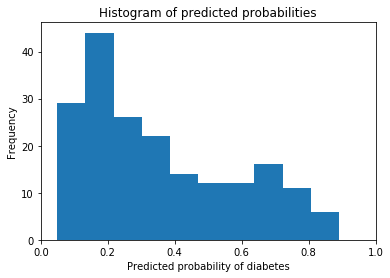

In [20]:
# histogram of predicted probabilities

save_predictions_proba = model.predict_proba(test_X)[:, 1]  # column 1

plt.hist(save_predictions_proba, bins=10)
plt.xlim(0,1) # x-axis limit from 0 to 1
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.show()

**Receiver Operating Characteristic (ROC) Curves**

Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?  We can do that by plotting the ROC curve.

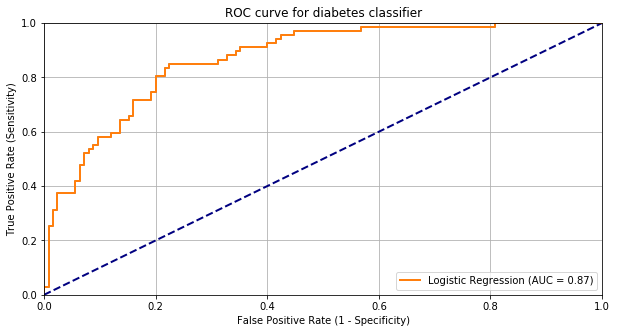

In [30]:
from sklearn.metrics import roc_curve, auc

# function roc_curve
# input: IMPORTANT: first argument is true values, second argument is predicted probabilities
#                   we do not use y_pred_class, because it will give incorrect results without 
#                   generating an error
# 
# output: FPR, TPR, thresholds
# FPR: false positive rate
# TPR: true positive rate
FPR, TPR, thresholds = roc_curve(test_Y, save_predictions_proba)

plt.figure(figsize=(10,5))  # figsize in inches
plt.plot(FPR, TPR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 50%  
plt.plot(FPR, TPR, lw=2, label='Logistic Regression (AUC = %0.2f)' % auc(FPR, TPR))
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")

AUC is the percentage of the ROC plot that is underneath the curve:

- AUC is useful as a single number summary of classifier performance, Higher value = better classifier
- AUC of 0.5 is like tossing a coin
- AUC is useful even when there is high class imbalance (unlike classification accuracy)
like in Fraud case with a null accuracy almost 99%

A ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context. You can't actually see the thresholds used to generate the curve on the ROC curve itself. You can use the function and plot below.

### Dimensionality reduction using PCA
- Principal component analysis (PCA) is a technique that transforms a dataset of many features into principal components that "summarize" the variance that underlies the data


- Each principal component is calculated by finding the linear combination of features that maximizes variance, while also ensuring zero correlation with the previously calculated principal components 


- Use cases for modeling:
    - One of the most common dimensionality reduction techniques
    - Use if there are too many features or if observation/feature ratio is poor
    - Also, potentially good option if there are a lot of highly correlated variables in your dataset


- Unfortunately, PCA makes models a lot harder to interpret

In [57]:
# Use PCA from sklearn.decompostion to find principal components
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pd.DataFrame(pca.fit_transform(pima_df))

In [58]:
X_pca.head()

,0,1,2,3,4,5,6,7,8
0,-75.714249,-35.954944,-7.260683,15.670527,16.507978,3.457417,-0.695208,0.374544,0.005562
1,-82.358466,28.909559,-5.496649,9.004430,3.480381,5.591914,-2.572576,-0.039284,-0.084468
2,-74.630229,-67.909633,19.461753,-5.653114,-10.299176,7.139400,4.286099,0.358068,0.190762
3,11.077206,34.900175,-0.053004,1.314561,-7.619943,2.583990,-0.810101,-0.082633,-0.261065
4,89.744156,-2.751263,25.213059,18.995906,8.525785,-9.491475,-3.619619,0.802747,1.526730


**PCA as dimensionality reduction**<br>
Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

**Choosing the number of components**<br>
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

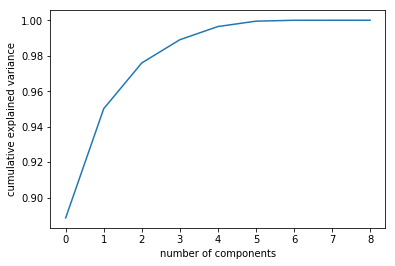

In [53]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [54]:
pca = PCA(n_components=5)
pca.fit(pima_df)
X_pca = pca.transform(pima_df)
print("original shape:   ", pima_df.shape)
print("transformed shape:", X_pca.shape)

('original shape:   ', (768, 9))
('transformed shape:', (768, 5))
